In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

from sklearn.model_selection import train_test_split

In [2]:
basePath = './data/subset_homework'
folderClass1 = "class_id_0"
folderClass2 = "class_id_1"


def readAllImages(folder):
    fullPath = os.path.join(basePath, folder)
    files = os.listdir(fullPath)
    return [cv2.imread(os.path.join(fullPath, file), cv2.IMREAD_UNCHANGED) for file in files]


def printImages(images):
    for idx in range(10):
        plt.subplot(2, 5, idx + 1)
        plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
        plt.title("img No " + str(idx + 1)), plt.axis(False)

In [3]:
images1 = readAllImages(folderClass1)
images2 = readAllImages(folderClass2)

In [4]:
print("class 1 len", len(images1))
print("class 2 len", len(images2))

class 1 len 2220
class 2 len 2250


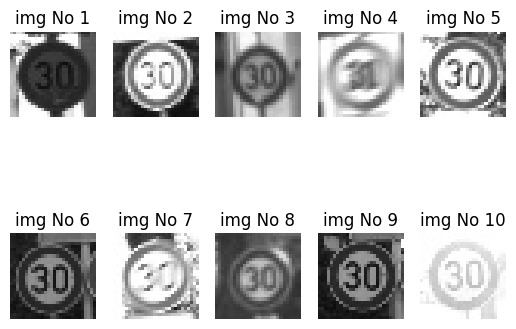

In [5]:
printImages(images1)

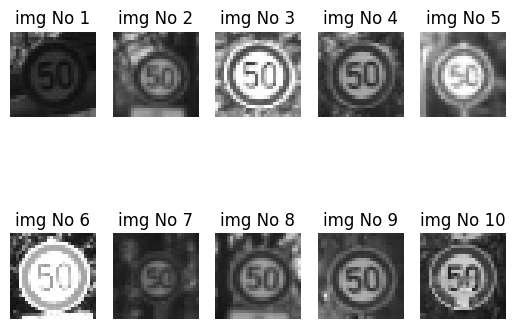

In [6]:
printImages(images2)

In [7]:
print(images1[0])

[[191 144 225 223 179  59  43  35  40  44  50  55  58  59  62  65 122  91
  167 213 187 147  79  36  40  39  83  73]
 [255 254 255 253 251 243 120 117 165 109 201 130  68  44  50  91 219 251
  255 253 255 255 123  75  64  64  88  83]
 [252 255 253 255 250 255 255 255 246 254 255 166  58  52  61 180 255 255
  255 253 254 253 157  90  88  87  87  87]
 [253 250 255 218 168 230 230 254 255 253 216 119  56  54  55  75 163 197
  243 255 254 255 156  93  92  92  85  87]
 [230 251 222 214 157 148 115 224 177  80  54  44  37  38  42  38  47  42
   68 153 230 254 166  90  87  87  85  84]
 [227 179 238 217 244 189 160  73  49  43  39  43  41  37  37  40  38  44
   42  40  68 185 165  88  90  90  91  86]
 [ 53  44 153 215 210 214  61  41  38  38  36  36  38  43  42  40  40  35
   38  38  40  48  65  81  84  86  86  84]
 [ 79  84 115 147 206  78  43  38  39  37  50  57  59  58  57  58  59  49
   42  36  35  40  46  66  84  89  86  88]
 [ 85 148 238 253 128  46  40  37  39  56  62  59  58  59  61  5

In [8]:
def flattenImages(images):
    return np.array([image.flatten() / 255.0 for image in images])

In [9]:
readyImages = flattenImages(images1 + images2)
labels = np.array(([0] * len(images1)) + ([1] * len(images2)))

In [10]:
readyImages.shape

(4470, 784)

In [11]:
inputs = Input(shape=([readyImages.shape[1]]))
outputs = Dense(1, activation="linear")(inputs)
modelSimple = Model(inputs, outputs)

modelSimple.compile(optimizer ='adam', loss = 'mean_squared_error', metrics=["accuracy"])
modelSimple.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [12]:
modelSimpleHistory = modelSimple.fit(readyImages, labels, epochs=10, validation_split=0.2)

Epoch 1/10
  1/112 [..............................] - ETA: 18s - loss: 0.7662 - accuracy: 0.6250

2024-11-22 01:04:26.051906: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


112/112 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.5721 - val_loss: 0.3360 - val_accuracy: 0.3781
Epoch 2/10
112/112 [==============================] - 0s 544us/step - loss: 0.2161 - accuracy: 0.6594 - val_loss: 0.4037 - val_accuracy: 0.2864
Epoch 3/10
112/112 [==============================] - 0s 502us/step - loss: 0.1842 - accuracy: 0.7192 - val_loss: 0.2370 - val_accuracy: 0.5537
Epoch 4/10
112/112 [==============================] - 0s 525us/step - loss: 0.1628 - accuracy: 0.7626 - val_loss: 0.3060 - val_accuracy: 0.4206
Epoch 5/10
112/112 [==============================] - 0s 660us/step - loss: 0.1412 - accuracy: 0.8029 - val_loss: 0.2778 - val_accuracy: 0.4821
Epoch 6/10
112/112 [==============================] - 0s 606us/step - loss: 0.1292 - accuracy: 0.8244 - val_loss: 0.2503 - val_accuracy: 0.5403
Epoch 7/10
112/112 [==============================] - 0s 517us/step - loss: 0.1185 - accuracy: 0.8473 - val_loss: 0.1986 - val_accuracy: 0.6600
Epoch

In [13]:
modelComplex = keras.Sequential(
    [
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),

        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=2)
modelComplex.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelComplex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0

In [14]:
modelComplexHistory = modelComplex.fit(readyImages, labels, epochs=10, validation_split=0.2)

Epoch 1/10


/opt/homebrew/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


112/112 [==============================] - 6s 50ms/step - loss: 0.0000e+00 - accuracy: 0.5996 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
112/112 [==============================] - 4s 40ms/step - loss: 0.0000e+00 - accuracy: 0.8937 - val_loss: 0.0000e+00 - val_accuracy: 0.4989
Epoch 3/10
112/112 [==============================] - 5s 46ms/step - loss: 0.0000e+00 - accuracy: 0.9888 - val_loss: 0.0000e+00 - val_accuracy: 0.4933
Epoch 4/10
112/112 [==============================] - 4s 38ms/step - loss: 0.0000e+00 - accuracy: 0.9894 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
112/112 [==============================] - 4s 40ms/step - loss: 0.0000e+00 - accuracy: 0.9958 - val_loss: 0.0000e+00 - val_accuracy: 0.9944
Epoch 6/10
112/112 [==============================] - 5s 42ms/step - loss: 0.0000e+00 - accuracy: 0.9975 - val_loss: 0.0000e+00 - val_accuracy: 0.9899
Epoch 7/10
112/112 [==============================] - 4s 40ms/step - loss: 0.0000e+00 - accuracy: 0.9

In [15]:
def reportLearningHistory(h):
    fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15, 12))


    ax1.plot(h.history['loss'], label='Training loss')
    ax1.plot(h.history['val_loss'], label='Validation loss')
    ax1.legend(loc="upper left")

    ax2.plot(h.history['accuracy'], label='Accuracy')
    ax2.plot(h.history['val_accuracy'], label='Validation accuracy')
    ax2.legend(loc="upper left")
    plt.show()

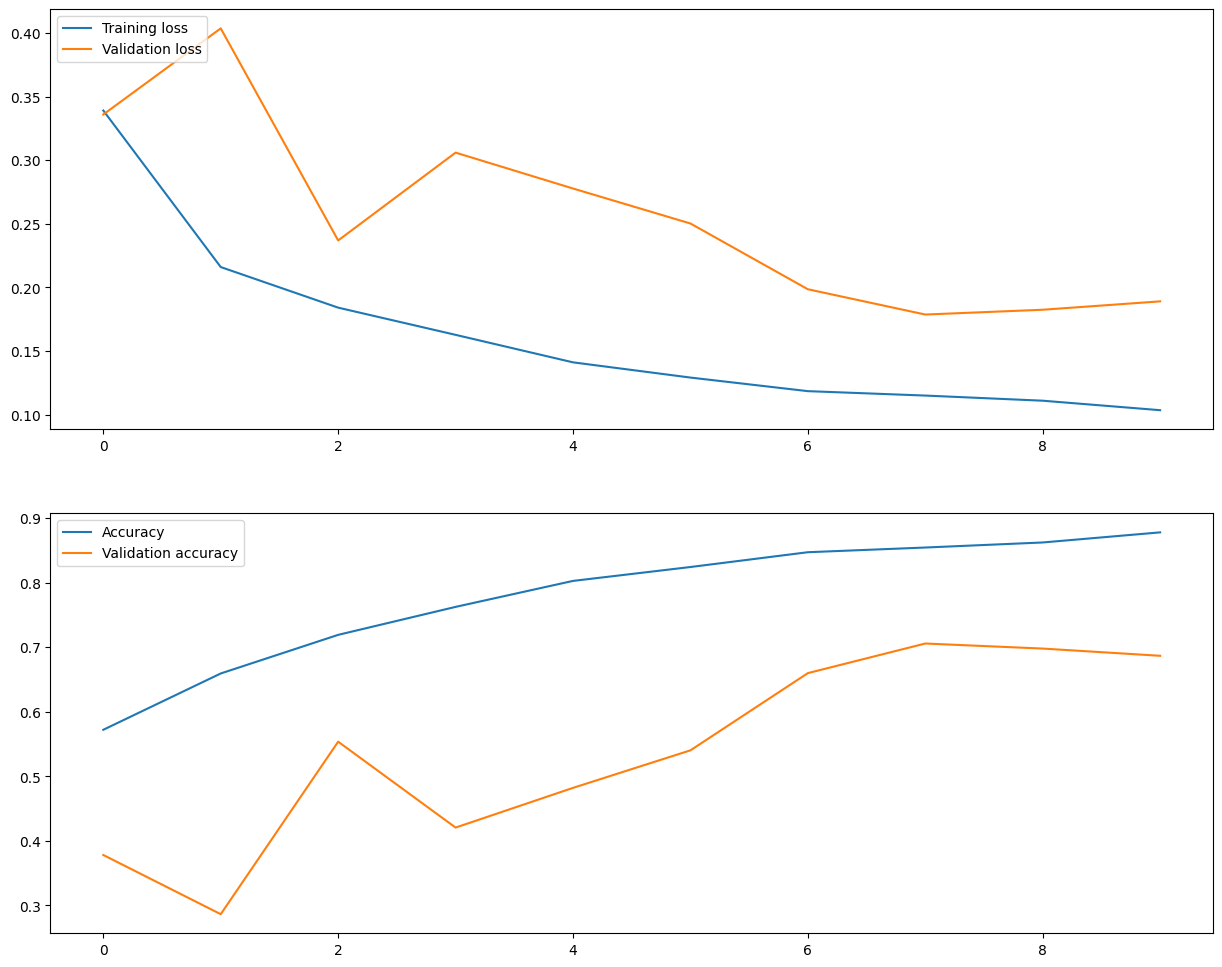

In [16]:
reportLearningHistory(modelSimpleHistory)

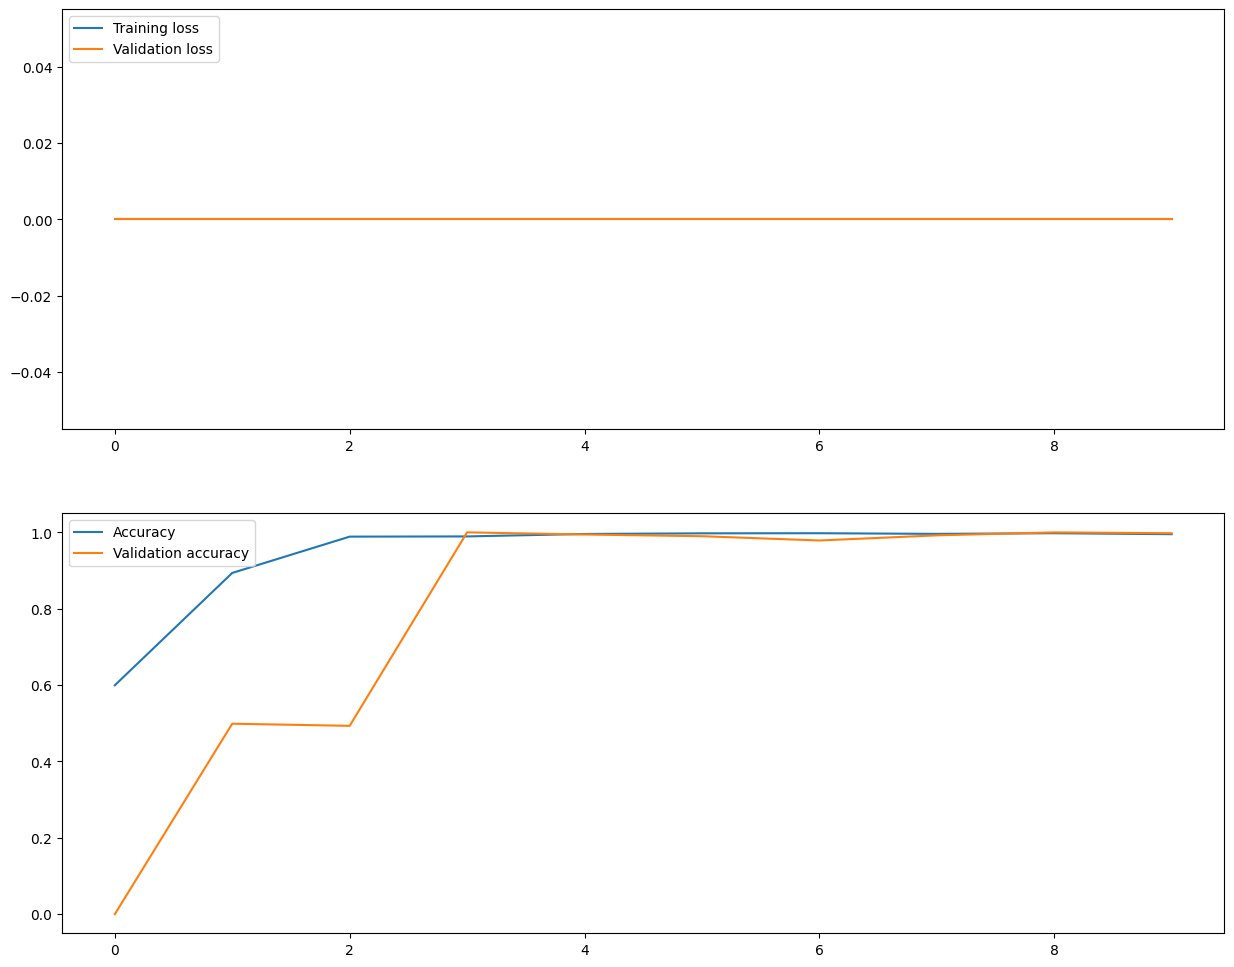

In [17]:
reportLearningHistory(modelComplexHistory)